# K-最近傍法モデル2項分類

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print('sklearn version : ' + sklearn.__version__)

sklearn version : 0.24.0


## データセットの読み込み

In [2]:
import mglearn

X, y = mglearn.datasets.make_forge()
print("X.shape : \n", X.shape)
print("\nX : \n", X[:5])
print("\ny.shape : \n", y.shape)
print("\ny : \n", y[:5])

X.shape : 
 (26, 2)

X : 
 [[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]]

y.shape : 
 (26,)

y : 
 [1 0 1 0 0]


c:\users\naolu\documents\github\sklearn_tutorials\.venv\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (19, 2)
X_test.shape :  (7, 2)
y_train.shape :  (19,)
y_test.shape :  (7,)


Text(0, 0.5, 'Second feature')

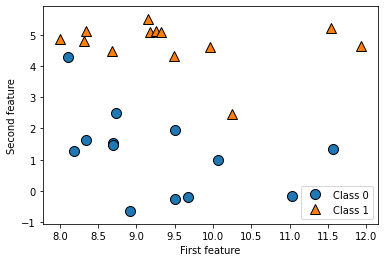

In [4]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"])
plt.xlabel("First feature")
plt.ylabel("Second feature")

## K-最近傍法(KNeighborsClassifier)モデルでの予測

K=1の場合入力データに最も近い訓練データのラベルが出力される

c:\users\naolu\documents\github\sklearn_tutorials\.venv\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


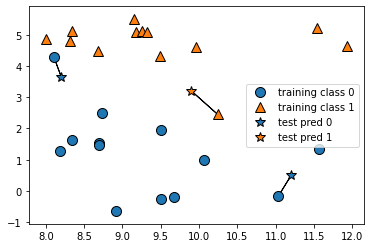

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

K=3の場合は近い3つの訓練データのラベルを多数決方式で出力する

c:\users\naolu\documents\github\sklearn_tutorials\.venv\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


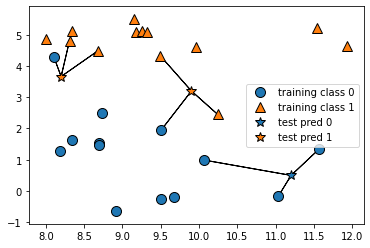

In [6]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## モデルの評価

In [8]:
knn.score(X_test, y_test)

0.8571428571428571

## モデルの分析

n = 1,3,9の場合の決定境界をグラフ化する。  
2次元のデータであれば予測ラベルの境界を図示できる。

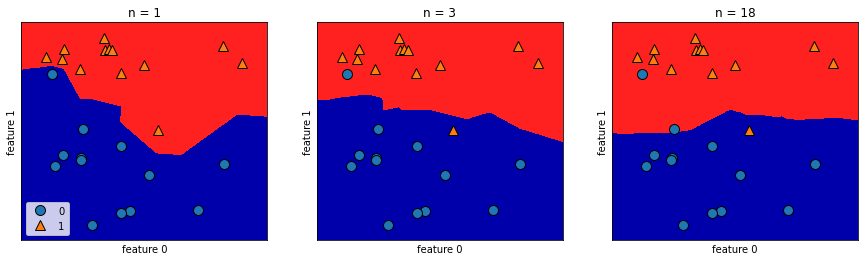

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for n, ax in zip([1, 3, 18], axes):
    knn= KNeighborsClassifier(n_neighbors=n).fit(X, y)
    mglearn.plots.plot_2d_separator(knn, X, fill=True, eps=0.5, ax=ax)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("n = " + str(n))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend()

n = 1～18の範囲それぞれで訓練データ、テストデータの精度をプロットする

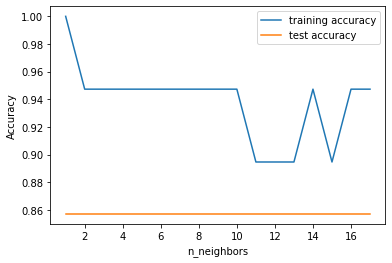

In [10]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 18)

for n in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()